# importing the libraries

In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv(r'playtennis.csv')

data preprocessing 

In [3]:
data.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [4]:
data.isnull().sum()

day         0
outlook     0
temp        0
humidity    0
wind        0
play        0
dtype: int64

In [5]:
data = data.drop_duplicates()


In [6]:
from sklearn.preprocessing import LabelEncoder
for i in  data.columns:
    data[i] = LabelEncoder().fit_transform(data[i])

zipping the features and declaring the class label 

In [7]:
outlook = data['outlook']  #assigning the attributes to variables for zip 
temp = data['temp']
features = list(zip(outlook,temp))
label =  data['play']

Naive Bayes classification

In [10]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(features,label)
pred =model.predict(features)


In [11]:
pred

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [12]:
print("the Gaussian model accuracy score is ",model.score(features,label))

the Gaussian model accuracy score is  0.7142857142857143


In [13]:
df = pd.DataFrame(features,label)

showing the distribution of the data

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>]], dtype=object)

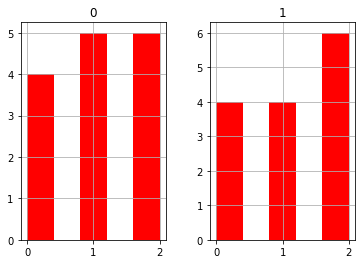

In [14]:
df.hist(bins = 5,color = "red")

In [15]:
data_df = pd.read_csv(r'playtennis.csv')

In [16]:
from sklearn.preprocessing import LabelEncoder
for i in data_df.columns:
    data_df[i] = LabelEncoder().fit_transform(data_df[i])
data
    

,day,outlook,temp,humidity,wind,play
0,0,2,1,0,1,0
1,6,2,1,0,0,0
2,7,0,1,0,1,1
3,8,1,2,0,1,1
4,9,1,0,1,1,1
5,10,1,0,1,0,0
6,11,0,0,1,0,1
7,12,2,2,0,1,0
8,13,2,0,1,1,1
9,1,1,2,1,1,1


defining the class label and the features

In [17]:
x = data_df.drop('play',axis = 1)
y = data_df['play']

train and test split 

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 42)

In [19]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   day       14 non-null     int32
 1   outlook   14 non-null     int32
 2   temp      14 non-null     int32
 3   humidity  14 non-null     int32
 4   wind      14 non-null     int32
 5   play      14 non-null     int32
dtypes: int32(6)
memory usage: 464.0 bytes


In [20]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
pred =model.predict(x_test)


In [21]:
pred

array([1, 0, 0, 1, 1])

In [22]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.6


array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'outlook'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'humidity'}>],
       [<AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'play'}>]], dtype=object)

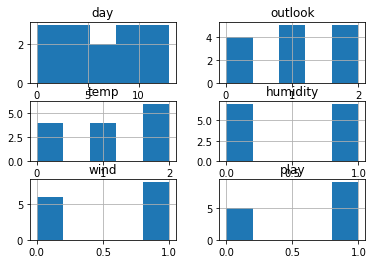

In [23]:
data_df.hist(bins=5)

In [24]:
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(pred,y_test))

[[1 1]
 [1 2]]


<AxesSubplot:>

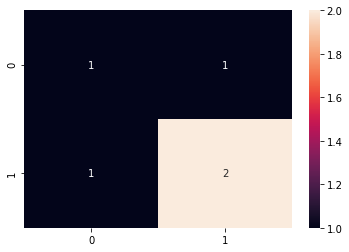

In [25]:
import seaborn as sns
sns.heatmap(confusion_matrix(pred,y_test),annot=True)